In [1]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd

In [2]:
df_freq_dec = pd.read_pickle('output/tdot_12_incidents.pkl')

In [3]:
segment_ids = np.unique(df_freq_dec.segment_id)

In [4]:
len(segment_ids)

315

In [5]:
df_freq_dec

,segment_id,time,lat,lng,count
8,75,2019-12-19 10:06:00,36.33891,-86.91617,1
9,75,2019-12-08 14:18:00,36.33207,-86.90093,1
10,75,2019-12-08 16:45:00,36.33152,-86.90128,1
11,75,2019-12-09 07:04:00,36.33891,-86.91617,1
34,78,2019-12-15 14:01:00,36.32500,-86.87300,1
...,...,...,...,...,...
6921,2922,2019-12-30 08:00:00,36.12500,-86.73495,1
6922,2922,2019-12-04 10:47:00,36.12430,-86.74385,1
6923,2922,2019-12-04 13:15:00,36.12435,-86.74214,1
6924,2922,2019-12-09 17:27:00,36.12434,-86.74273,1


In [6]:
try:
    df_freq_dec_full = pd.read_pickle('resources/tdot_12_incidents_full.pkl')
except:
    target = []
    for segment_id in tqdm(segment_ids):
        time_idx = pd.date_range('12-01-2019 00:00', '12-31-2019 23:59', freq='1min')
        for time in time_idx:
            target += [{
                'segment_id' : segment_id,
                'time' : time,
            }]
    df_target = pd.DataFrame(target)
    df_target.head()
    df_freq_dec_full = df_target.merge(df_freq_dec, how='outer')
    df_freq_dec_full.to_pickle('resources/tdot_12_incidents_full.pkl')

In [7]:
waze_12 = pd.read_csv('output/waze_12_etrims.csv', index_col=0)

In [8]:
waze_12

,country,nThumbsUp,city,reportRating,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,lng,lat,reportDescription,seg_id,seg_id_dist
0,US,0,"Nashville, TN",3,1,7,ACCIDENT,5a9e667f-3bda-3224-9662-e5a7e455f94f,3.0,233,NaN,I-40 W,1575340901000,-86.636268,36.151548,NaN,929,0.000254
1,US,0,"Goodlettsville, TN",1,0,5,ACCIDENT,03913aca-5045-3a89-94c7-378159603e8b,3.0,56,ACCIDENT_MINOR,Vietnam Veterans Blvd,1575337336000,-86.706220,36.304490,NaN,1959,0.001020
2,US,0,"Nashville, TN",1,0,5,ACCIDENT,94be551e-412f-3961-b1ef-490cf22fee40,4.0,153,NaN,to I-24 E / Chattanooga,1575384564000,-86.698586,36.083495,NaN,167,0.000021
3,US,0,"Nashville, TN",2,1,7,ACCIDENT,4707613e-1798-3052-bb7b-74a6647311e4,6.0,151,ACCIDENT_MAJOR,Old Hickory Blvd,1575383199000,-86.603257,36.175815,NaN,942,0.005940
4,US,0,"Nashville, TN",2,5,10,ACCIDENT,daf0a810-a07a-34d2-bc41-1a18168ee48f,3.0,333,NaN,I-65 N,1575384364000,-86.771595,36.111977,NaN,1883,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50443,US,0,"Nashville, TN",4,4,10,ACCIDENT,e76fe4e7-4d54-3048-b542-4a09fdf1a697,3.0,154,NaN,I-24 E,1577232278000,-86.766115,36.168500,NaN,129,0.000045
50460,US,0,"Nashville, TN",0,0,6,ACCIDENT,830fc2fc-d144-378c-911b-b6d558b6c6cb,3.0,6,NaN,I-65 N,1577310140000,-86.775226,36.214167,NaN,1924,0.000062
50504,US,0,"Nashville, TN",4,2,10,ACCIDENT,e76fe4e7-4d54-3048-b542-4a09fdf1a697,3.0,154,NaN,I-24 E,1577232278000,-86.766115,36.168500,NaN,129,0.000045
50551,US,0,"Nashville, TN",2,0,5,ACCIDENT,4b669ed2-65c3-3a07-88af-668804f5eb74,7.0,24,ACCIDENT_MAJOR,Hobson Pike,1577232037000,-86.598100,36.057902,NaN,198,0.047417


In [9]:
waze_12['time'] = pd.to_datetime(waze_12['pubMillis'], unit='ms')

In [10]:
segment_reports = []
for sid in tqdm(segment_ids):
    waze_12_records = waze_12[waze_12.seg_id == int(sid)]
    waze_12_records = waze_12_records.set_index('time')
    df_freq_dec_records = df_freq_dec[df_freq_dec.segment_id == sid]
    df_freq_dec_records = df_freq_dec_records.set_index('time')
    frames = [waze_12_records, df_freq_dec_records]
    dataset = pd.concat(frames).sort_index()
    dataset.loc[:, 'segment_id'] = int(sid)
    dataset = dataset.drop('seg_id', axis=1)
    dataset = dataset.drop_duplicates()
    segment_reports.append(dataset)
    dataset.to_csv(f'output/dataset/output_segment_{int(sid)}.csv')

  0%|          | 0/315 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
100%|██████████| 315/315 [00:04<00:00, 70.39it/s]


In [11]:
segment_reports_df = pd.concat(segment_reports)
segment_reports_df = segment_reports_df.reset_index()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


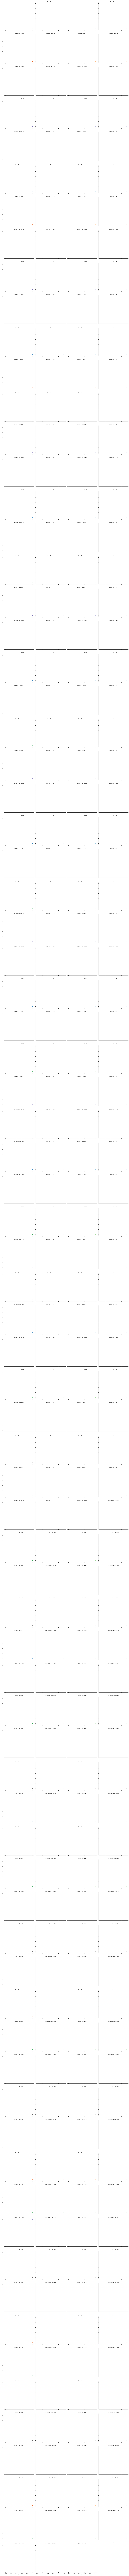

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

def plot_series(df):
    # Initialize a grid of plots with an Axes for each walk
    grid = sns.FacetGrid(df, col="segment_id", hue="segment_id", palette="tab20c", col_wrap=4, height=5)
    # Draw a line plot to show the trajectory of each random walk
    grid.map(sns.scatterplot, "time", "count", marker="o")
    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
plot_series(segment_reports_df)

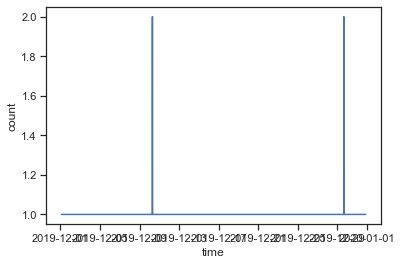

In [13]:
sns.lineplot("time", "count", data=segment_reports_df)

In [14]:
# UUID
# Ignore data after 30 mins ?

In [16]:
segment_reports_df.head()

,time,city,confidence,count,country,lat,lng,magvar,nThumbsUp,pubMillis,reliability,reportDescription,reportRating,roadType,seg_id_dist,segment_id,street,subtype,type,uuid
0,2019-12-01 23:34:40,NaN,1.0,NaN,US,36.335189,-86.907914,299.0,0.0,1.575243e+12,8.0,NaN,1.0,3.0,0.000643,75.0,I-24 W,NaN,ACCIDENT,f5a5e50d-5b47-3003-a7a1-9d01ac0efe61
1,2019-12-01 23:34:40,NaN,1.0,NaN,US,36.335189,-86.907914,299.0,0.0,1.575243e+12,7.0,NaN,1.0,3.0,0.000643,75.0,I-24 W,NaN,ACCIDENT,f5a5e50d-5b47-3003-a7a1-9d01ac0efe61
2,2019-12-01 23:34:40,NaN,0.0,NaN,US,36.335189,-86.907914,299.0,0.0,1.575243e+12,5.0,NaN,1.0,3.0,0.000643,75.0,I-24 W,NaN,ACCIDENT,f5a5e50d-5b47-3003-a7a1-9d01ac0efe61
3,2019-12-01 23:34:40,NaN,0.0,NaN,US,36.335189,-86.907914,299.0,0.0,1.575243e+12,6.0,NaN,1.0,3.0,0.000643,75.0,I-24 W,NaN,ACCIDENT,f5a5e50d-5b47-3003-a7a1-9d01ac0efe61
4,2019-12-06 18:29:59,NaN,0.0,NaN,US,36.333695,-86.904564,299.0,0.0,1.575657e+12,5.0,NaN,2.0,3.0,0.000642,75.0,I-24 W,NaN,ACCIDENT,f350c62f-e35c-3012-b6e7-7f29cb2e69b6


In [17]:
np.sum(df_freq_dec_full['count'])

820.0

In [18]:
df_freq_dec_full.loc[:, 'count'] = df_freq_dec_full['count'].fillna(0)

In [19]:
df_freq_dec_full[(df_freq_dec_full.segment_id==75) & (df_freq_dec_full.time=='2019-12-19 10:06:00')]

,segment_id,time,count
26526,75,2019-12-19 10:06:00,1.0


In [20]:
df_freq_dec_full = df_freq_dec_full.sort_values(by='time')

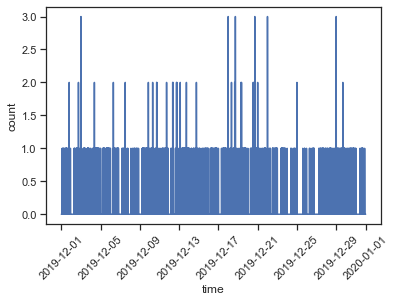

In [21]:
df_count = df_freq_dec_full.groupby(['time'])['count'].sum()
df_count = df_count.reset_index()

ax = sns.lineplot(x="time", y="count", data=df_count)

plt.setp(ax.get_xticklabels(), rotation=45)

ax

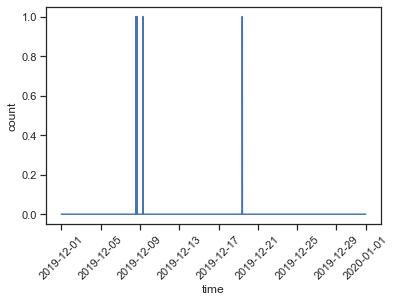

In [22]:
df_count = df_freq_dec_full[df_freq_dec_full.segment_id==75].groupby(['time'])['count'].sum()
df_count = df_count.reset_index()

ax = sns.lineplot(x="time", y="count", data=df_count)

plt.setp(ax.get_xticklabels(), rotation=45)

ax

In [23]:
df_count.to_csv('output/count_dec_df.csv')